# Pymaceuticals Inc. Data Analysis
Completed March 2019, by Chief Data Analyst

### Observable Trends
Key trends observed in the data are as follows:

- Of the total revenue (USD 2,379.77), the vast majority is generated from male players (USD 1,967.64). However, female players on average purchase 10% more by value than male players (respectively USD 4.47 vs USD 4.07 average total purchase per person).
- Close to half of our revenue (USD 1,114.06) is generated from our peak age demographic of 20-24. However, players between the age of 35-39 and <10 spend on average USD 4.76 and USD 4.54, respectivly per person. This is 10% (USD 0.44) and 5% (USD 0.22) higher than the USD 4.32 average total purchase per person of the 20-24 year old players.
- The top selling item, both by value (USD 50.76) and by count (12) is Oathbreaker, Last Hope of the Breaking Storm

In [137]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load file
mouse_drug_data_file = "mouse_drug_data.csv"
clinical_trial_data_file = "clinicaltrial_data.csv"

In [138]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_file)
mouse_drug_data.head()
clinical_trial_data = pd.read_csv(clinical_trial_data_file)
clinical_trial_data.head()

# Combine the data into a single dataset
merged_data= pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumor Response Treatment

In [139]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Grouped_merged_data = merged_data.groupby(["Drug","Timepoint"])
Mean_Tumor_Volume = Grouped_merged_data[["Tumor Volume (mm3)"]].mean()

# Convert to DataFrame
Mean_Tumor_Volume_df = Mean_Tumor_Volume.reset_index()

# Preview DataFrame
Mean_Tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [140]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StdErr_Tumor_Volume = Grouped_merged_data[["Tumor Volume (mm3)"]].sem()

# Convert to DataFrame
StdErr_Tumor_Volume_df = StdErr_Tumor_Volume.reset_index()

# Preview DataFrame
StdErr_Tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [212]:
# Minor Data Munging to Re-Format the Data Frame
Mean_Tumor_Volume_pivot = Mean_Tumor_Volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
StdErr_Tumor_Volume_pivot = StdErr_Tumor_Volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")


# Preview that Reformatting worked
Mean_Tumor_Volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [213]:
# Preview that Reformatting worked
StdErr_Tumor_Volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


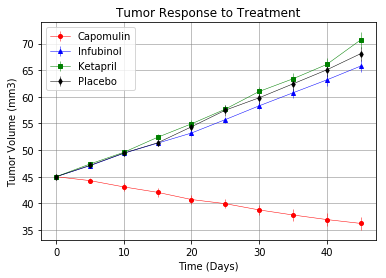

In [226]:
# Generate the Plot (with Error Bars)
markers = ["o", "^", "s", "d"]
colors = ['r', 'b', 'g', 'k']
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = list(Mean_Tumor_Volume_pivot.index.values)

fig, ax = plt.subplots()

for i in range(4):
    m = markers[i]
    c = colors[i] 
    d = drugs[i]
    ax.errorbar(x_axis, 
                Mean_Tumor_Volume_pivot[d], 
                StdErr_Tumor_Volume_pivot[d], 
                marker= m, color= c, label=d, linewidth=0.5, markersize=4)
    

ax.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(color='grey', linestyle='-', linewidth=.5,)

# Save the Figure
plt.savefig(".Tumor_Response_to_Treatment.png")

# Show the Figure
plt.show()

### Metastatic Response to Treatment

In [227]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Metastatic_Sites = Grouped_merged_data[["Metastatic Sites"]].mean()

# Convert to DataFrame
Mean_Metastatic_Sites_df = Mean_Metastatic_Sites.reset_index()

# Preview DataFrame
Mean_Metastatic_Sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [228]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
StdErr_Metastatic_Sites = Grouped_merged_data[["Metastatic Sites"]].sem()

# Convert to DataFrame
StdErr_Metastatic_Sites_df = StdErr_Metastatic_Sites.reset_index()

# Preview DataFrame
StdErr_Metastatic_Sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [229]:
# Minor Data Munging to Re-Format the Data Frame
Mean_Metastatic_Sites_pivot = Mean_Metastatic_Sites_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
StdErr_Metastatic_Sites_pivot = StdErr_Metastatic_Sites_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")


# Preview that Reformatting worked
Mean_Metastatic_Sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [230]:
# Preview that Reformatting worked
StdErr_Metastatic_Sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


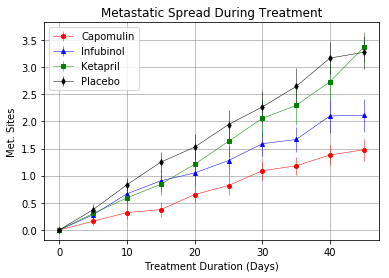

In [232]:
# Generate the Plot (with Error Bars)
markers = ["o", "^", "s", "d"]
colors = ['r', 'b', 'g', 'k']
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = list(Mean_Metastatic_Sites_pivot.index.values)

fig, ax = plt.subplots()

for i in range(4):
    m = markers[i]
    c = colors[i] 
    d = drugs[i]
    ax.errorbar(x_axis, 
                Mean_Metastatic_Sites_pivot[d], 
                StdErr_Metastatic_Sites_pivot[d], 
                marker= m, color= c, label=d, linewidth=0.5, markersize=4)
    

ax.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(color='grey', linestyle='-', linewidth=.5,)

# Save the Figure
plt.savefig(".Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

### Survival Rates

In [239]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Count = Grouped_merged_data[["Mouse ID"]].count()

# Convert to DataFrame
Mice_Count_0 = Mice_Count.rename(columns={"Mouse ID":"Mouse Count"})
Mice_Count_df = Mice_Count_0.reset_index()

# Preview DataFrame
Mice_Count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [241]:
# Minor Data Munging to Re-Format the Data Frame
Mice_Count_pivot = Mice_Count_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview that Reformatting worked
Mice_Count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


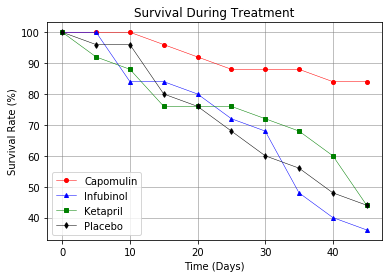

In [256]:
# Generate the Plot (Accounting for percentages)
markers = ["o", "^", "s", "d"]
colors = ['r', 'b', 'g', 'k']
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = list(Mice_Count_pivot.index.values)

for i in range(4):
    m = markers[i]
    c = colors[i] 
    d = drugs[i]
    plt.plot(x_axis, 
            Mice_Count_pivot[d]/Mice_Count_pivot[d].max()*100, 
            marker= m, color= c, label=d, linewidth=0.5, markersize=4)

plt.legend(loc="lower left")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(color='grey', linestyle='-', linewidth=.5,)

# Save the Figure
plt.savefig(".Survival_During_Treatment.png")

# Show the Figure
plt.show()

### Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()